In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
dataset_base = json.load(
    open('../sslad_object.json', 'r')
)

In [3]:
dataset_base['labeled_objects'], dataset_base['images'][0], dataset_base['annotations'][0], dataset_base['calibrations'][0]['P']

(['car', 'pedestrian', 'truck', 'bicycle', 'bus', 'motorcycle'],
 '/data/SSLAD-2D/labeled/train/HT_TRAIN_000001_SH_000.jpg',
 [{'image_id': 0,
   'bbox2d': [65, 667, 239, 793],
   'visibility_level': 0,
   'category_name': 'car'},
  {'image_id': 0,
   'bbox2d': [418, 701, 448, 753],
   'visibility_level': 0,
   'category_name': 'bicycle'},
  {'image_id': 0,
   'bbox2d': [399, 708, 426, 752],
   'visibility_level': 0,
   'category_name': 'bicycle'},
  {'image_id': 0,
   'bbox2d': [347, 701, 379, 752],
   'visibility_level': 0,
   'category_name': 'bicycle'},
  {'image_id': 0,
   'bbox2d': [330, 698, 358, 751],
   'visibility_level': 0,
   'category_name': 'bicycle'},
  {'image_id': 0,
   'bbox2d': [283, 698, 313, 752],
   'visibility_level': 0,
   'category_name': 'bicycle'},
  {'image_id': 0,
   'bbox2d': [249, 689, 290, 754],
   'visibility_level': 0,
   'category_name': 'bicycle'},
  {'image_id': 0,
   'bbox2d': [459, 710, 479, 752],
   'visibility_level': 0,
   'category_name': 'bic

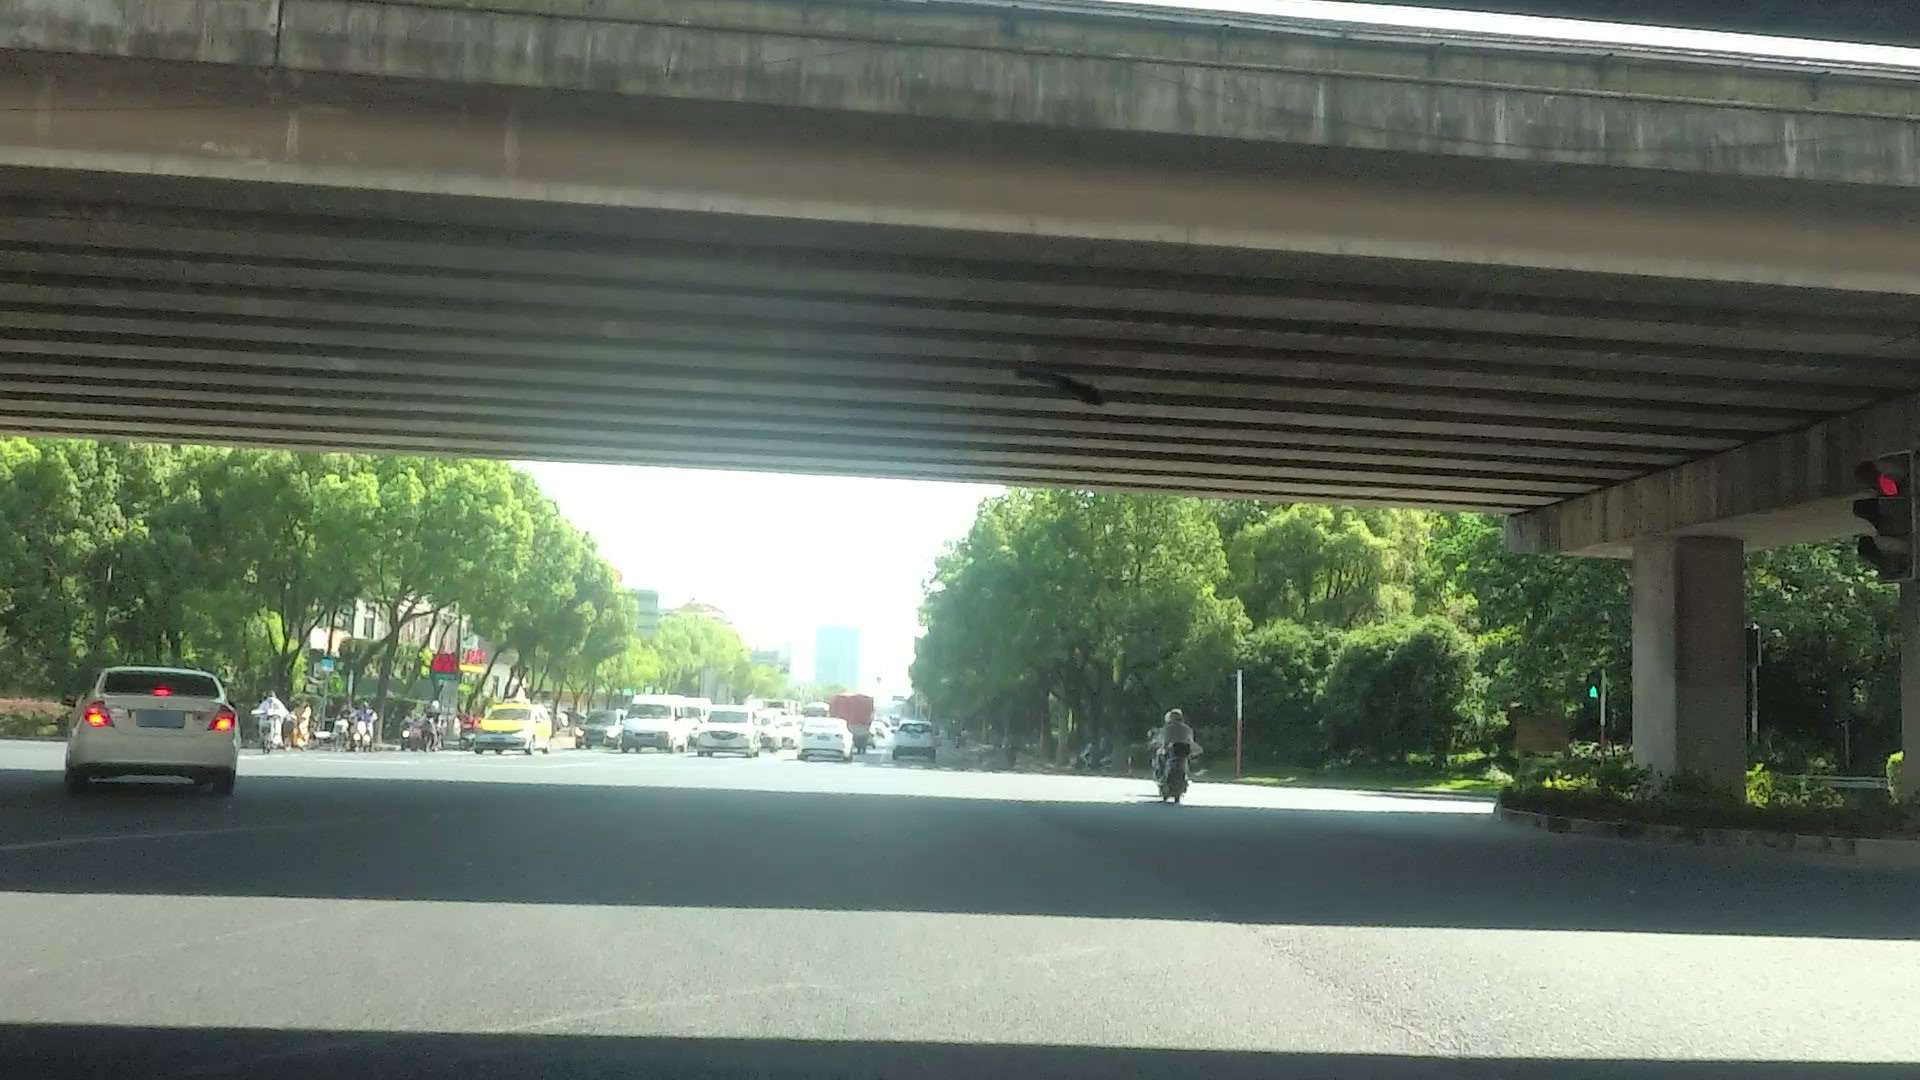

In [4]:
image = Image.open(dataset_base['images'][0])
image

## Compute 3D WHL mean status for each categories 

In [5]:
import json
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

LABELED_OBJECTS = ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
collections = {}
for cate in LABELED_OBJECTS:
    collections[cate] = dict(
        current_whl_mean = np.zeros(3),
        total_number = 0
    )

In [6]:
def compute_stat_additive(dataset_base, collections):
    nbr_frames = len(dataset_base['images'])
    import tqdm
    for i in tqdm.tqdm(range(nbr_frames)):
        frame_annotations = dataset_base['annotations'][i]
        for anno in frame_annotations:
            class_name = anno['category_name']
            n0 = collections[class_name]['total_number']
            mean = collections[class_name]['current_whl_mean']
            whl = np.array(anno['whl'])
            mean = (whl + mean * n0) / (n0 + 1)
            collections[class_name]['total_number'] = n0 + 1
            collections[class_name]['current_whl_mean'] = mean
    return collections

In [8]:
kitti_json = json.load(
    open('../kitti_object.json', 'r')
)
collections = compute_stat_additive(kitti_json, collections)

100%|██████████| 7481/7481 [00:00<00:00, 30973.84it/s]


In [9]:
for key in collections:
    print(f"{key}: whl={collections[key]['current_whl_mean']}, total_number={collections[key]['total_number']}")

car: whl=[1.62858987 1.52608343 3.88395449], total_number=28742
truck: whl=[2.08851048 2.49186128 6.45151946], total_number=4008
bus: whl=[ 2.54373777  3.52892368 16.09426614], total_number=511
trailer: whl=[0. 0. 0.], total_number=0
construction_vehicle: whl=[0. 0. 0.], total_number=0
pedestrian: whl=[0.66018944 1.76070649 0.84228438], total_number=4487
motorcycle: whl=[0. 0. 0.], total_number=0
bicycle: whl=[0.5967732  1.73720344 1.7635464 ], total_number=1627
traffic_cone: whl=[0. 0. 0.], total_number=0
barrier: whl=[0. 0. 0.], total_number=0


In [10]:
nusc_json = json.load(
    open('../nusc_object.json', 'r')
)

In [11]:
collections = compute_stat_additive(nusc_json, collections)

  0%|          | 0/168780 [00:00<?, ?it/s]

100%|██████████| 168780/168780 [00:09<00:00, 18105.22it/s]


In [12]:
for key in collections:
    print(f"{key}: whl={collections[key]['current_whl_mean']}, total_number={collections[key]['total_number']}")

car: whl=[1.94238329 1.72329705 4.58210833], total_number=545363
truck: whl=[2.4978052  2.82146811 6.92185879], total_number=97544
bus: whl=[ 2.94139576  3.49946059 11.3666146 ], total_number=17278
trailer: whl=[ 2.9424345   3.89485595 12.56497162], total_number=28580
construction_vehicle: whl=[2.85463092 3.20760183 6.68172204], total_number=15880
pedestrian: whl=[0.66802746 1.76831253 0.72971758], total_number=217468
motorcycle: whl=[0.77512876 1.46120922 2.11132403], total_number=11758
bicycle: whl=[0.60424873 1.34778991 1.70597688], total_number=12761
traffic_cone: whl=[0.40898672 1.07991256 0.41431673], total_number=91570
barrier: whl=[2.51739646 0.98816352 0.49513314], total_number=149983


In [13]:
once_json = json.load(
    open('../once_object.json', 'r')
)
collections = compute_stat_additive(once_json, collections)
for key in collections:
    print(f"{key}: whl={collections[key]['current_whl_mean']}, total_number={collections[key]['total_number']}")

100%|██████████| 34727/34727 [00:01<00:00, 26384.91it/s]

car: whl=[1.92571256 1.69820575 4.54449836], total_number=648648
truck: whl=[2.5010921  2.81674231 6.98551092], total_number=104531
bus: whl=[ 2.92870594  3.4514828  11.35087841], total_number=20863
trailer: whl=[ 2.9424345   3.89485595 12.56497162], total_number=28580
construction_vehicle: whl=[2.85463092 3.20760183 6.68172204], total_number=15880
pedestrian: whl=[0.67407287 1.76267095 0.73243403], total_number=233093
motorcycle: whl=[0.77512876 1.46120922 2.11132403], total_number=11758
bicycle: whl=[0.7422314  1.347823   2.01872732], total_number=49556
traffic_cone: whl=[0.40898672 1.07991256 0.41431673], total_number=91570
barrier: whl=[2.51739646 0.98816352 0.49513314], total_number=149983


In [15]:
json_collect = {}
for key in collections:
    json_collect[key] = dict(
        total_number = collections[key]['total_number'],
        whl = list(collections[key]['current_whl_mean'])
    )
json.dump(json_collect, open('../mean_whl_k_n_o.json', 'w'))

## Visualize Augmented Bounding Boxes for Debugging

In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
from easydict import EasyDict as edict
import cv2
import os
import copy
import torch

from mono3d.model.utils import BBox3dProjector, BackProjection
from mono3d.evaluation.utils import draw_3D_box
from vision_base.utils.builder import build

In [2]:
rgb_std = np.array([0.229, 0.224, 0.225])
rgb_mean = np.array([0.485, 0.456, 0.406])
def denorm(image):
    new_image = np.clip((image * rgb_std + rgb_mean) * 255, 0, 255)
    new_image = np.array(new_image, dtype=np.uint8)
    return new_image

def draw_bbox2d_to_image(image, bboxes2d, color=(255, 0, 255)):
    drawed_image = image.copy()
    for box2d in bboxes2d:
        cv2.rectangle(drawed_image, (int(box2d[0]), int(box2d[1])), (int(box2d[2]), int(box2d[3])), color, 3)
    return drawed_image

def draw_3D_box_from_obj_list(image, obj_lists, P):
    projector = BBox3dProjector()
    for obj in obj_lists:
        bbox_3d_state = torch.tensor(
           np.concatenate([obj['xyz'], obj['whl'], np.array([obj['alpha']])])
        ).reshape([1, 7]).float()
        _, homo_corner, _ = projector(bbox_3d_state, P)
        image = draw_3D_box(image, homo_corner[0].cpu().numpy().T)
    return image

augmentation_lib = 'vision_base.data.augmentations.augmentations'
builder_lib = 'vision_base.utils.builder'
demo_dataset_cfg = edict(
    name = "mono3d.data.dataset.JsonMonoDataset",
    data3d_json = os.path.join('/home/segmentation', 'mean_whl.json'),
    main_calibration_key='P2',
    max_objects     = 128,
    json_path = os.path.join('/home/segmentation', 'nusc_val_object.json'),
    augmentation = edict(
    name=f'{builder_lib}.Sequential',
    cfg_list=[
            edict(name=f'{augmentation_lib}.ConvertToFloat'),
            # edict(name='mono3d.data.augmentation.RandomWarpAffine', output_w=784, output_h=512),
            edict(name=f'mono3d.data.augmentation.Resize', size=(384, 1280), preserve_aspect_ratio=True, force_pad=True),
            edict(name=f'mono3d.data.augmentation.RandomMirror', mirror_prob=0.5),
            edict(name=f'{augmentation_lib}.Normalize', mean=rgb_mean, stds=rgb_std),
            edict(name=f'{augmentation_lib}.ConvertToTensor'),
    ],
    image_keys=['image'],
    calib_keys=['P'],
    object_keys = ['objs_list']
    )
)

dataset = build(**demo_dataset_cfg)
projector = BBox3dProjector().cuda()
backprojector = BackProjection().cuda()

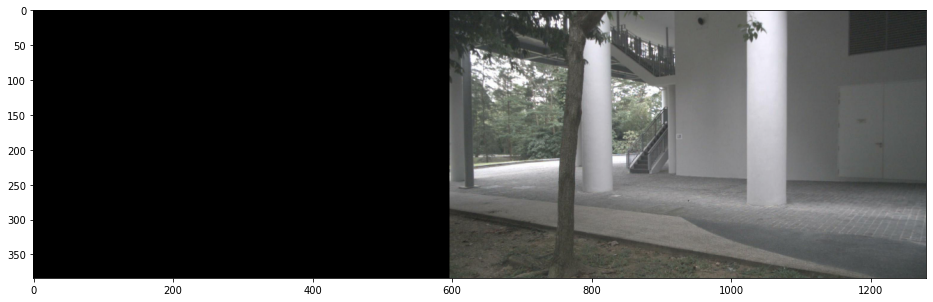

In [8]:
index = np.random.randint(0, len(dataset))
data = dataset[index]
image_np = denorm(data['image'].cpu().numpy().transpose([1, 2, 0]))
image_np = draw_bbox2d_to_image(image_np, [obj['bbox2d'] for obj in data['objs_list']])
image_np = draw_3D_box_from_obj_list(image_np, data['objs_list'], data['P'])
fig = plt.figure(figsize=(16, 10))
plt.imshow(image_np)

In [9]:
dataset.dataset_base['images'][index], index, len(dataset)

('/data/nuscene/samples/CAM_FRONT_LEFT/n015-2018-07-11-11-54-16+0800__CAM_FRONT_LEFT__1531281613754844.jpg',
 8339,
 36114)